In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt

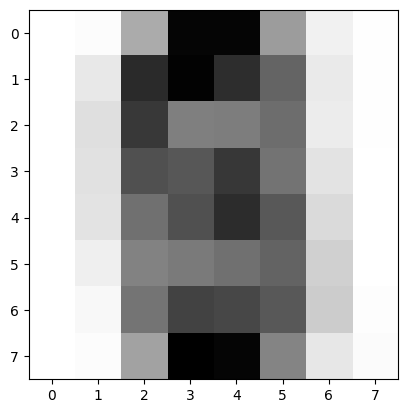

In [2]:
images = sklearn.datasets.load_digits()
all_digit_pictures = images["data"]

#part A
average_number = np.average(all_digit_pictures, axis=0)

plt.imshow(average_number.reshape((8,8)), cmap="Grays")


despite this vector being visualized as an 8x8 matrix, it's actually a 64 dimensional vector in R^n where n=64

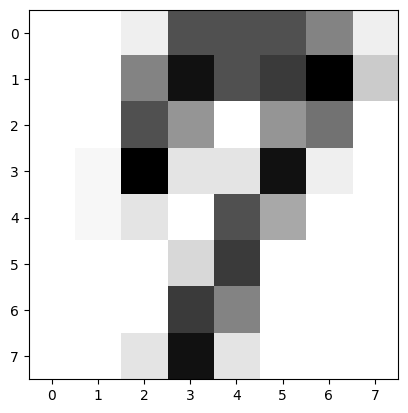

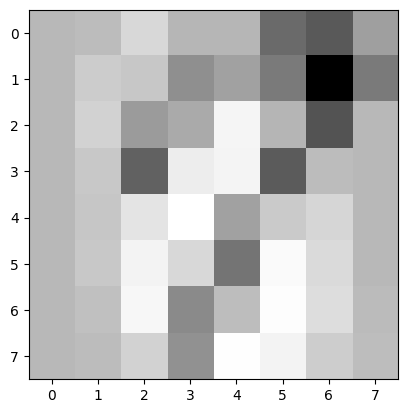

In [3]:
#part b
zero_centered_digits = all_digit_pictures-average_number


example = 438
plt.imshow(all_digit_pictures[example].reshape((8,8)), cmap='Grays')
plt.show()
plt.imshow(zero_centered_digits[example].reshape((8,8)), cmap='Grays')

In [4]:
# part C
U,S,VH = np.linalg.svd(zero_centered_digits)


print(VH[0])
print(VH.shape)

[ 1.77484909e-19  1.73094651e-02  2.23428835e-01  1.35913304e-01
  3.30323092e-02  9.66340844e-02  8.32943805e-03 -2.26900082e-03
  3.20516495e-04  1.19308905e-01  2.44451676e-01 -1.48512745e-01
  4.67319410e-02  2.17740744e-01  1.48136776e-02 -4.47779518e-03
  4.94136398e-05  7.95419375e-02 -8.33951454e-02 -2.15915342e-01
  1.72126801e-01  1.63712098e-01 -2.86444452e-02 -4.23251803e-03
 -9.85488574e-05 -6.42319144e-02 -2.54093316e-01  3.56771026e-02
  2.09462569e-01  4.31311420e-02 -5.13118688e-02 -2.13422732e-04
  0.00000000e+00 -1.59950883e-01 -3.68690774e-01 -1.64406827e-01
 -8.52007908e-02 -3.72982855e-02 -2.15866980e-02  0.00000000e+00
 -1.28865585e-03 -1.06945287e-01 -3.03067457e-01 -2.47813041e-01
 -2.09637296e-01 -1.22325219e-02  3.69458497e-02 -1.61485028e-03
 -6.93023548e-04  8.35144239e-03  5.58598986e-02 -9.30534169e-02
 -1.07387720e-01  1.37734565e-01  6.32879466e-02 -9.61671077e-04
 -9.55079131e-06  1.40786840e-02  2.35675488e-01  1.41225588e-01
  9.15964553e-03  8.94184

In [5]:
def graph_vector(vector):
  plt.imshow(vector.reshape((8,8)), cmap='Grays')
  plt.show()



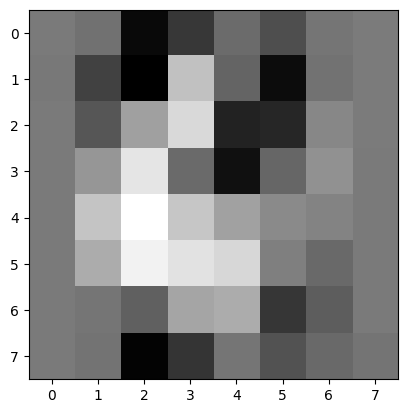

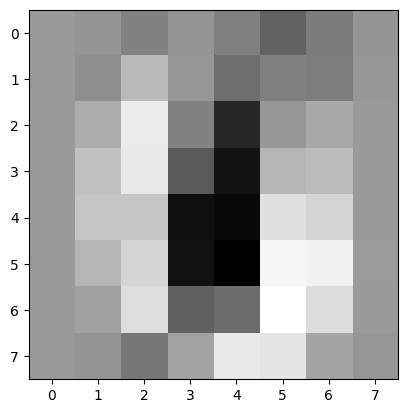

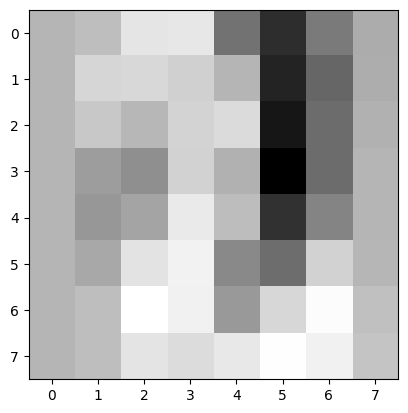

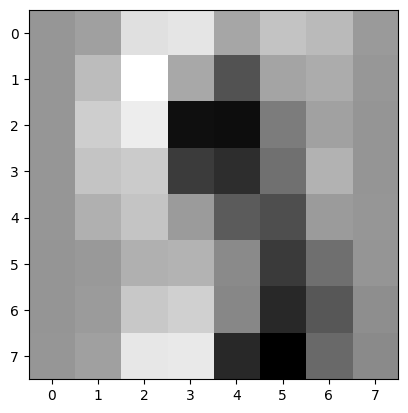

In [6]:

for i in range(4):
  graph_vector(VH[i])

Our understanding is that each pixel is on a scale from -(some number) to +(some number). So if we understand that the principal component is the "direction" the data is moving in, the white and black pixels are the ones with strong movement in that dimension, and the gray pixels are the ones with little to no movement in that direction. This is why we see the columns 0 and 7 being a very middle gray color on all of the principal components: because almost no data has writing in those columns.

In [7]:
def proportion_of_variance(r, singular_values):
  R_sum = 0
  N_sum = 0
  for i, sigma in enumerate(singular_values):
    if i < r:
      R_sum += sigma**2
    N_sum += sigma**2
  return R_sum/N_sum


In [8]:
outputs = [proportion_of_variance(i+1, S) for i in range(len(S))]
#print(outputs)

i = 0
while(outputs[i] < 0.9):
  i+=1
print(f'all the principal components through #{i+1} (1-indexed) account for {outputs[i]*100}% of the data. This is the fewest to get over 90%')

all the principal components through #21 (1-indexed) account for 90.31985012037215% of the data. This is the fewest to get over 90%


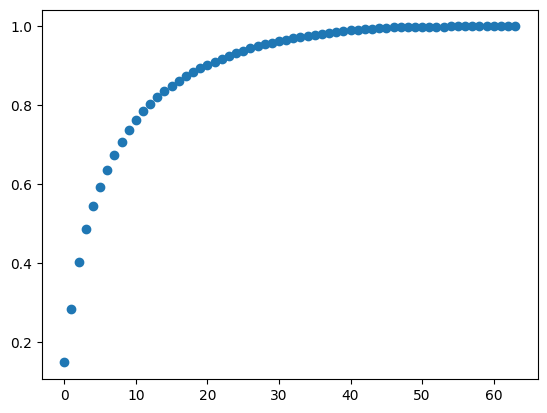

In [9]:
plt.scatter([i for i in range(len(outputs))], outputs)

In [10]:
def project_onto_pca(principal_components, num_components, digit):
  subspace = principal_components[0:num_components, :]
  print((subspace.T@subspace).shape)
  return (subspace.T @ subspace)@ digit


(64, 64)


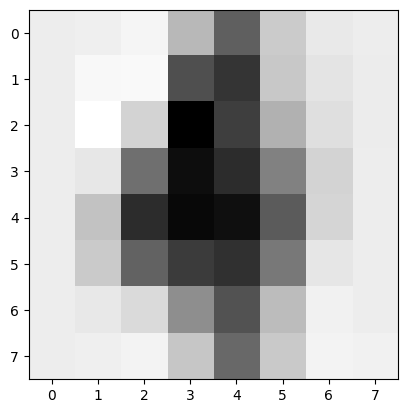

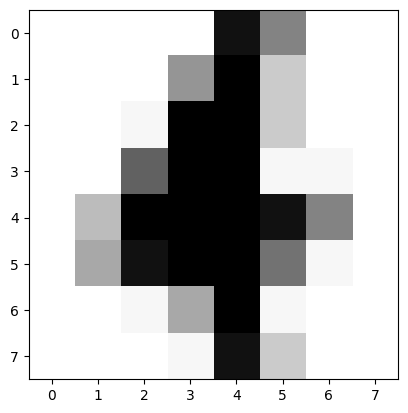

In [11]:
arbitrary_digit = 239

graph_vector(project_onto_pca(VH,8, zero_centered_digits[arbitrary_digit]) + average_number)
graph_vector(all_digit_pictures[arbitrary_digit])

we believe the digits become recognizable around 7 or 8 principal components.